<a href="https://colab.research.google.com/github/karagulamos/loan-default-risk-estimation/blob/main/Loan_Risk_Estimation_Bank_of_Middle_Earth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loan Default Risk Estimation Model for Bank of Middle-Earth**

# **Disaster scenario**

The land of Middle-earth is facing a severe drought, which has led to crop failures and widespread hardship. The bank is concerned that this will lead to an increase in loan defaults, and it needs a model to help it assess the risk of each loan.

# **Artificial data**

To create artificial data that fits the disaster scenario, we can start with a list of features that are likely to be relevant to the probability of loan default, such as:

* Loan amount
* Loan term
* Borrower's income
* Borrower's debt-to-income ratio
* Borrower's credit score
* Borrower's age
* Borrower's employment status
* Borrower's credit history
* Region where the borrower lives

We can then generate random values for each feature and use them to create a dataset of artificial loans. However, the problem with random artificially generated data is that it's difficult to simulate real-world scenarios. For example, borrowers in regions severely affected by the drought are likely low-income earners who may find it hard to repay their loans due to reduced crop yields and livestock production, whose distribution might be difficult to simulate with my approach for this exercise.

#**Model**

A simple model we could use to predict the probability of loan default is a Logistic Regression model. This model takes the features of the loan and the borrower as input and produces a probability of default as output.

I chose this model since it aligns with the binary nature of the problem — whether a borrower will default or not. It can efficiently handle moderate-sized datasets and is computationally efficient compared to alternative methods, making it practical for this scenario and allowing for rapid development.

Focusing on relevant features provides a clear understanding of risk factors. Logistic Regression serves as a robust, intuitive baseline model for estimating the probability of loan default in an interpretable and efficient way.

# **Code**

In [ ]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# # Load the artificial data (first approach)
# data = pd.read_csv('loan_data.csv')

random_state = 42

# Set a seed for reproducibility
np.random.seed(random_state)

# Generate artificial data (second approach)
num_samples = 1000

table = {
    'loan_amount': np.random.uniform(10000, 50000, num_samples),
    'borrower_income': np.random.uniform(50000, 150000, num_samples),
    'loan_term': np.random.uniform(12, 60, num_samples),  # months
    'debt_to_income_ratio': np.random.uniform(0.25, 0.85, num_samples),
    'borrower_credit_score': np.random.uniform(400, 750, num_samples),
    'borrower_age': np.random.uniform(18, 75, num_samples),
    'employment_status': np.random.choice(['Employed', 'Unemployed'], size=num_samples),
    'credit_history': np.random.choice(['Excellent', 'Good', 'Fair', 'Poor'], size=num_samples),
    'region': np.random.choice(['Gondor', 'Eriador', 'Mordor'], size=num_samples),
    'default': np.random.choice([0, 1], size=num_samples, p=[0.70, 0.30]) # 0 = Non-Default, 1 = Default
}

data = pd.DataFrame(table)

categorical_features = ['employment_status', 'credit_history', 'region']

# One-hot encode the categorical features
data = pd.get_dummies(data, columns=categorical_features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('default', axis=1), data['default'], test_size=0.25)

# Create a SMOTE oversampler to rebalance the data
smote = SMOTE(random_state=random_state)

# Oversample the training data
X_train, y_train = smote.fit_resample(X_train, y_train)

# Create the logistic regression model
model = LogisticRegression(random_state=random_state)

# Fit the model to the training data
model.fit(X_train, y_train)

# Calculate the accuracy of the model on the training data
y_pred = model.predict(X_train)
accuracy = np.mean(y_pred == y_train)
print('Training accuracy:', accuracy)

# Calculate the accuracy of the model on the testing data
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print('Testing accuracy:', accuracy)

# Calculate other accuracy metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1_score)
print('Confusion matrix:')
print(cm)

# Perform cross-validation
n_folds = 5
cv_scores = cross_val_score(model, X_train, y_train, cv=n_folds)

# Calculate the average of the cross-validation scores
average_score = np.mean(cv_scores)
print('Average cross-validation score:', average_score)

# Calculate total non-defaults and defaults
print('Total non-defaults:', np.count_nonzero(y_pred == 0))
print('Total defaults:', np.count_nonzero(y_pred) )

Training accuracy: 0.7568807339449541
Testing accuracy: 0.612
Precision: 0.2545454545454545
Recall: 0.2
F1 score: 0.22399999999999998
Confusion matrix:
[[139  41]
 [ 56  14]]
Average cross-validation score: 0.5100917431192661
Total non-defaults: 195
Total defaults: 55



# **Accuracy metrics**

#### **Training and Testing Accuracy**

The model has an accuracy of 0.7568 on the training data and 0.612 on the testing data. This means that the model correctly predicts whether a loan will default or not in 75.68% of the cases on the training data and in 61.2% of the cases on the testing data.

#### **Precision, Recall, and F1 Score**

The model has a precision of 0.2545 and a recall of 0.2. This means that the model is only predicting positive instances 25.45% of the time, but when it does predict a positive instance, it is correct 20% of the time.

The F1 score of our model is 0.2239, which relatively low and suggests that the model is performing poorly. A reasonable F1 score would be anywhere from 0.7 and higher.

#### **Interpreting the Confusion Matrix**

* True positives (139): borrowers the model correctly predicted would not default on their loans.

* False positives (41): borrowers the model incorrectly predicted would default but who did not.

* False negatives (56): borrowers the model incorrectly predicted would not default on their loans but who actually did.

* True negatives (14): borrowers the model correctly predicted would default on their loans.

The model has a high number of false negatives (56), which means it's missing a significant number of borrowers who are actually likely to default on their loans - scary stuff.

#### **Cross-validation**

Overall, the accuracy metrics suggest that the model is performing well on the training data. However, the testing accuracy and the cross-validation score of 0.51 suggest that the model is not generalizing well to new data. This means that the model is likely to perform poorly on new borrowers. This could be due to a number of factors, such as overfitting, bias, or insufficient data.

I might be able to improve the performance of the model by combining one or more of the following techniques:

* Using a larger "real-world" training set
* Trying different model architectures
* Tuning the model hyperparameters
* Using regularization techniques to prevent overfitting
* Identifying and removing any sources of bias in the training data

# **Charts**


**Feature Importance**

This chart emphasizes a feature's importance, which can help creditors understand which factors contribute most to the model's predictions. This is crucial for transparency and trust in the model's decision-making process.

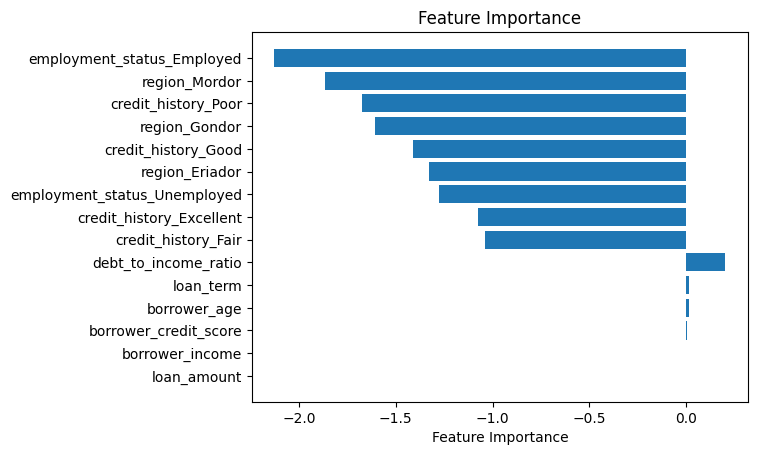

In [ ]:
import matplotlib.pyplot as plt

feature_importance = model.coef_[0]
feature_names = X_train.columns
sorted_idx = np.argsort(np.abs(feature_importance))

plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.show()

**Confusion Matrix**

This chart highlights the true positives, true negatives, false positives, and false negatives in the loan default risk estimation model. It gives creditors a comprehensive view of the model's performance relating to correctly predicted defaults and non-defaults.

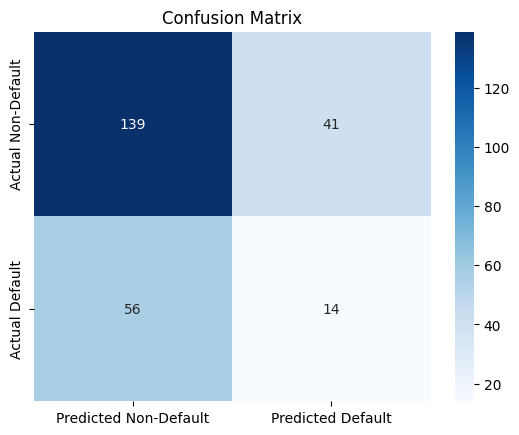

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted Non-Default', 'Predicted Default'], yticklabels=['Actual Non-Default', 'Actual Default'])
plt.title('Confusion Matrix')
plt.show()

**Precision-Recall Curve**

Shows the relationship between precision and recall at different thresholds. Creditors can use this to assess the model's ability to identify actual defaults while minimizing false alarms.

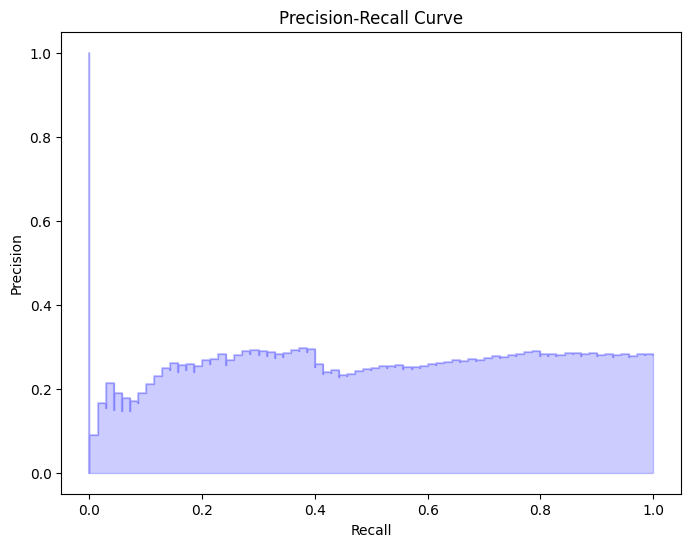

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:,1])

plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

**Receiver Operating Characteristic (ROC) Curve**

Shows the trade-off between true-positive rate and false-positive rate at various thresholds.  Creditors can use this to understand the model's ability to distinguish between default and non-default cases.

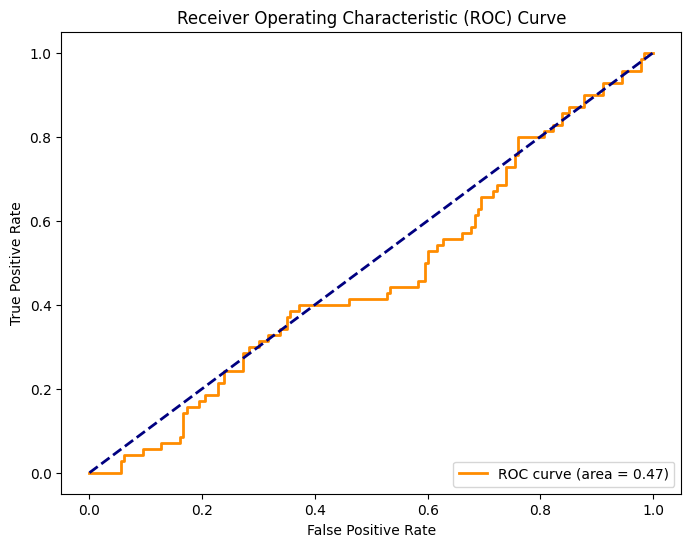

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# **Next Improvement Steps**

One way to improve the accuracy of the model would be to add more features to the dataset. For example, adding features such as the the type of loan and employment history (e.g. # of months employed) can help the model make more accurate predictions. This can be helpful in predicting the borrower's ability to repay a loan.

Furthermore, we can employ a technique known as cross-validation to assess the performance of our model and tune its hyperparameters. We could also try scaling the data to improve the accuracy of our model since we may have disproportionately large data points, which might be out-of-scale and can skew our predictions. For this, I can use `StandardScaler` as shown below for better accuracy:

```python
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_scaled, data['default'], test_size=0.25)
```

**NOTE**: *I've included this snippet here as an afterthought and plan to revisit the code to adapt some of these improvements.*

Finally, another approach would be to use more complex ML algorithms. Although the logistic regression model I used here is simple and effective, more complex models, such as random forests and gradient boosting machines, can achieve equally higher accuracy.

# **Conclusion**

For this exercise, I employed a simple logistic regression model to predict the probability of loan default. The model is fairly accurate, but it could be improved by adding more features to the dataset, using a more complex machine learning algorithm, some feature engineering, and tuning the hyperparameters.